In [1]:
%config Completer.use_jedi = False
import warnings

warnings.filterwarnings(action='ignore')

분류 신경망 실습
신경망을 이용해 와인 종류를 분류하는 모형을 만들어본다.

In [2]:
# 일관된 결과값이 나오도록 random seed를 설정한다.
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [3]:
# 데이터 불러오기
from sklearn import datasets  # 와인 데이터를 사용하기 위해 import 한다.

raw_wine = datasets.load_wine()  # 와인 데이터를 불러온다.

In [4]:
# 피쳐/타겟 데이터 지정
X = raw_wine.data  # 와인 피쳐 데이터를 저장한다.
y = raw_wine.target  # 와인 타겟 데이터를 저장한다.

In [5]:
# 피처 데이터 차원 확인
X.shape  # 결과를 확인하면 총 13개의 피쳐가 사용되는데, 이는 신경망을 생성할 때 사용된다.

(178, 13)

In [6]:
# 타겟 데이터 종류 확인
# 타겟 데이터 종류를 확인함으로써 분류 문제인지 아니면 회귀 문제인지 파악할 수 있고, 분류 문제라면 몇 가지 클래스로
# 구분되는지 알 수 있다.
set(y)

{0, 1, 2}

In [7]:
# 타겟 데이터 원-핫 인코딩
from keras.utils import to_categorical  # 원-핫 인코딩을 사용하기 위해 import 한다.

y_hot = to_categorical(y)  # 타겟 데이터를 넣고 원-핫 인코딩을 실행한다.
y_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [8]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split  # 트레이닝/테스트 데이터 분할을 위해 import 한다.

# 피쳐 데이터와 원-핫 인코딩된 타겟 데이터를 트레이닝 데이터와 테스트 데이터로 분할한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state=0)
X_tn.shape, X_te.shape

((133, 13), (45, 13))

In [9]:
# 시퀀스 API 신경망 생성
from keras.models import Sequential  # 시퀀스 API 신경망 생성하기 위해 import 한다.
# from keras.layers import Dense # 신경망에 추가할 layer를 생성하기 위해 import 한다.
# from keras.layers import BatchNormalization # 배치 정규화를 하기 위해 import 한다.
# from keras.layers import Activation # 활성화 함수 layer를 생성하기 위해 import 한다.
from keras.layers import Dense, BatchNormalization, Activation

# 신경망에 사용되는 피쳐 개수(n)와 클래스 개수(c)를 저장한다.
n = X_tn.shape[1]
c = len(set(y))
# print('피쳐 개수: {}, 클래스 개수: {}'.format(n, c))
e = 30  # 학습 횟수를 의미하는 epoch 값을 설정한다.

batch size: 하나의 미니 배치에 속하는 데이터의 개수
epoch: 전체 트레이닝 데이터셋이 신경망을 통과한 횟수
iteration(반복): 1 epoch를 마치는데 필요한 미니 배치 개수

In [10]:
# Sequential()로 신경망 모형을 만들고 add() 함수를 이용해서 layer를 추가한다.
model = Sequential()  # 신경망 모델을 만든다.
# units 옵션으로 출력 차원, input_dim 옵션으로 입력 데이터(피쳐) 차원을 지정해서 입력 layer를 만든다.
model.add(Dense(units=20, input_dim=n))  # 입력 layer를 만든다.
model.add(BatchNormalization())  # 배치 정규화를 실행한다.
model.add(Activation('relu'))  # 활성화 함수를 relu로 지정한다.
model.add(Dense(units=c))  # 출력 layer를 만든다. 구분해야 할 클래스 개수만큼 출력 노드 개수로 설정한다.
model.add(Activation('softmax'))  # 활성화 함수를 softmax로 지정한다.
model.summary()

Metal device set to: Apple M2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
___________________________

2023-04-17 01:58:28.300106: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-17 01:58:28.300551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# 모형 컴파일
# loss 옵션으로 손실 함수를 지정하는데, 이진 분류 문제에서는 binary_crossentropy를 지정하고, 3개 아상의 클래스로
# 분류하는 다중 분류 문제에서는 categorical_crossentropy를 지정한다.
# optimizer 옵션으로 최적화 함수(optimizer)를 지정하고 metrics 옵션으로 평가 기준을 지정한다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 신경망 학습
# 트레이팅 데이터(X_tn), 트레이팅 데이터에 따른 타겟 데이터(y_tn), epoch, batch_size
hist = model.fit(X_tn, y_tn, epochs=e, batch_size=5)

Epoch 1/30


2023-04-17 01:58:28.620213: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-17 01:58:28.817516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 1s 24ms/step - loss: 1.9798 - accuracy: 0.3459
Epoch 2/30
27/27 [==============================] - 0s 8ms/step - loss: 1.6155 - accuracy: 0.3835
Epoch 3/30
27/27 [==============================] - 0s 8ms/step - loss: 1.2918 - accuracy: 0.3985
Epoch 4/30
27/27 [==============================] - 0s 9ms/step - loss: 1.0279 - accuracy: 0.4436
Epoch 5/30
27/27 [==============================] - 0s 9ms/step - loss: 0.9092 - accuracy: 0.5263
Epoch 6/30
27/27 [==============================] - 0s 8ms/step - loss: 0.8728 - accuracy: 0.6015
Epoch 7/30
27/27 [==============================] - 0s 8ms/step - loss: 0.8734 - accuracy: 0.5639
Epoch 8/30
27/27 [==============================] - 0s 9ms/step - loss: 0.7951 - accuracy: 0.6241
Epoch 9/30
27/27 [==============================] - 0s 8ms/step - loss: 0.8200 - accuracy: 0.5940
Epoch 10/30
27/27 [==============================] - 0s 8ms/step - loss: 0.7862 - accuracy: 0.6165
Epoch 11/30
27/27 [==========

In [13]:
# 학습 평가
print(model.evaluate(X_tn, y_tn))  # 트레이닝 데이터 학습 평가
print(model.evaluate(X_te, y_te))  # 테스트 데이터 학습 평가

5/5 [==============================] - 0s 10ms/step - loss: 0.6297 - accuracy: 0.6917
[0.6297096014022827, 0.6917293071746826]
1/2 [==============>...............] - ETA: 0s - loss: 0.5494 - accuracy: 0.7188

2023-04-17 01:58:36.318090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 108ms/step - loss: 0.6020 - accuracy: 0.6889
[0.6020445823669434, 0.6888889074325562]


In [14]:
# 정확도 및 손실 정도 시각화 준비
epoch = np.arange(1, e + 1)
print(epoch)
accuracy = hist.history['accuracy']
print(accuracy)
loss = hist.history['loss']
print(loss)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[0.3458646535873413, 0.3834586441516876, 0.39849624037742615, 0.4436090290546417, 0.5263158082962036, 0.6015037298202515, 0.5639097690582275, 0.6240601539611816, 0.5939849615097046, 0.61654132604599, 0.6616541147232056, 0.6842105388641357, 0.6842105388641357, 0.6992481350898743, 0.7142857313156128, 0.7744361162185669, 0.7518796920776367, 0.7518796920776367, 0.7443609237670898, 0.7894737124443054, 0.8045112490653992, 0.7669172883033752, 0.8421052694320679, 0.8270676732063293, 0.8270676732063293, 0.8345864415168762, 0.8270676732063293, 0.8421052694320679, 0.8345864415168762, 0.8421052694320679]
[1.979773759841919, 1.6155273914337158, 1.2918152809143066, 1.02794349193573, 0.909153401851654, 0.8727604746818542, 0.8733513355255127, 0.7951133251190186, 0.820001482963562, 0.7861706018447876, 0.7411314845085144, 0.7207051515579224, 0.7283934354782104, 0.7208503484725952, 0.6616479158401489, 0.638423621

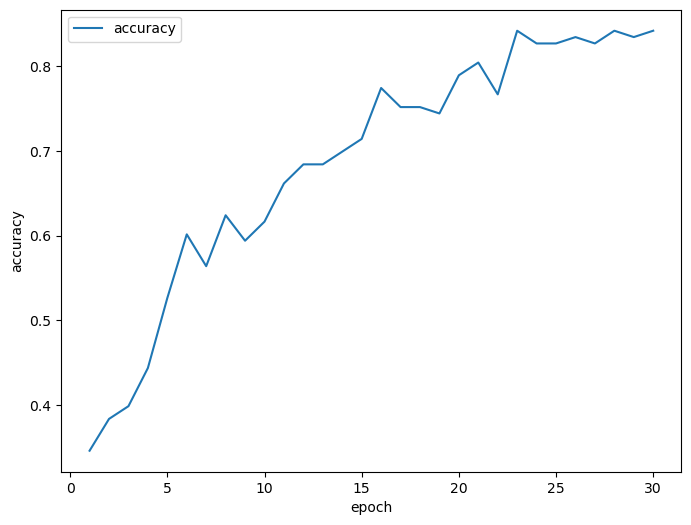

In [15]:
# 학습 정확도 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 6])
plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
# 정확도 확인 결과 에포크 진행 단계별로 정확도가 상승하는 것을 볼 수 있다.

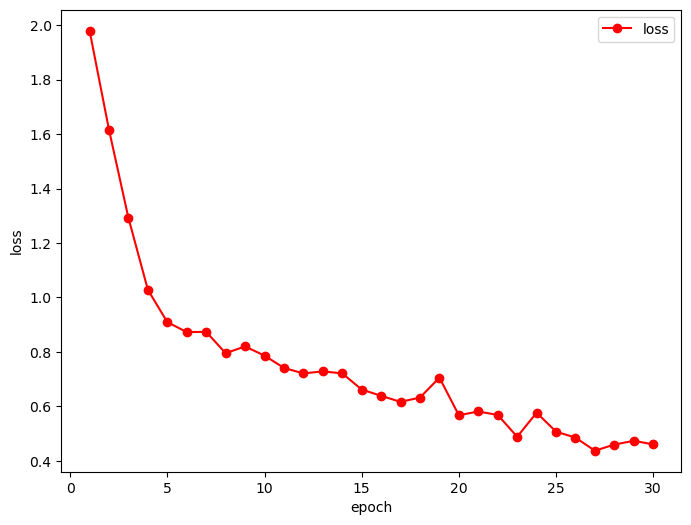

In [16]:
# 손실 그래프
plt.figure(figsize=[8, 6])
plt.plot(epoch, loss, 'r', marker='o', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
# 손실 확인 결과 에포크 진행 단계별로 손실이 점차 낮아지는 것을 볼 수 있다.